In [ ]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as dt
from scipy.stats import norm, shapiro
from scipy.stats import skew, kurtosis
from scipy.stats import t, norm, kstest
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [ ]:
pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def multivariate_var(tickers, # list of tickers
                     weights, # np.array of weights
                     from_date, #date in format yyyy-mm-dd
                     to_date, #date in format yyyy-mm-dd
                     initial_investment, # value of initial investment (integer or float)
                     alpha, # alpha, where 1 - alpha = confidence level
                     n # number of days for n-days VaR calculation
                     ):

  returns = pd.DataFrame(dtype=float)
  for ticker in tickers:
    data = pd.DataFrame(dtype=float)
    data = yf.download(ticker, from_date, to_date)
    data['return'] = 0
    for i in range(1, data.shape[0]):
      data['return'].iat[i] = (data['Close'].iloc[i] - data['Close'].iloc[i-1])/(data['Close'].iloc[i-1])
    returns[f'{ticker} returns'] = data['return'].iloc[:]
  print(returns)

  mean = np.mean(returns.values, axis=0)
  u = weights.T @ mean
  cov_matrix = np.cov(returns.values.astype(float), rowvar=False)
  sigma_squared = weights.T @ cov_matrix @ weights

  ret = norm.ppf(1 - alpha, loc=u, scale=(n * sigma_squared) ** 0.5)*initial_investment

  return ret, sigma_squared



In [ ]:
multivariate_var(['DIS','TSLA','ADSK','AMC'], np.array([0.05, 0.05, 0.4, 0.05]), '2018-04-01', '2020-08-01', 1050, 0.05, 50)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
            DIS returns  TSLA returns  ADSK returns  AMC returns
Date                                                            
2018-04-02     0.000000      0.000000      0.000000     0.000000
2018-04-03     0.007703      0.059609      0.017026     0.077739
2018-04-04     0.015389      0.072553      0.021307     0.009836
2018-04-05     0.011491      0.065449      0.004078     0.061688
2018-04-06    -0.017236     -0.021000     -0.017732     0.006116
...                 ...           ...           ...          ...
2020-07-27    -0.011054      0.086521      0.029243    -0.032500
2020-07-28    -0.001118     -0.040991     -0.021319     0.072351
2020-07-29    -0.004906      0.015320      0.017180     0.002410
2020-07-3

164.07164621309698

In [ ]:
multivariate_var(['AAPL', 'C', 'TSLA'], np.array([0.1, 0.1, 0.8]), '2018-02-01', '2020-05-01', 1000, 0.01, 10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
            AAPL returns  C returns  TSLA returns
Date                                             
2018-02-01      0.000000   0.000000      0.000000
2018-02-02     -0.043390  -0.027525     -0.015748
2018-02-05     -0.024984  -0.048689     -0.030895
2018-02-06      0.041792   0.021155      0.002522
2018-02-07     -0.021407   0.002272      0.033027
...                  ...        ...           ...
2020-04-24      0.028870   0.015073      0.027663
2020-04-27      0.000707   0.080278      0.101496
2020-04-28     -0.016209   0.013960     -0.037095
2020-04-29      0.032845   0.064605      0.040813
2020-04-30      0.021096  -0.033824     -0.023273

[565 rows x 3 columns]


265.34509387960605

pdr.get_data_yahoo всё также не работает

In [ ]:
data = pdr.get_data_yahoo('AAPL', '2018-02-01', '2020-05-01')

Рассмотрим портфель из 6 акций Amazon, Adobe, Facebook (Meta), Netflix, Microsoft, PayPal

In [ ]:
stocks = ['AMZN', 'ADBE', 'META', 'NFLX', 'MSFT', 'PYPL']
start = "2018-01-01"
end = "2019-12-31"
num_stocks = len(stocks)
weights = np.array([0.15, 0.15, 0.15, 0.15, 0.15, 0.25])

In [ ]:
df = pd.DataFrame(columns=stocks)
for item in stocks:
  df[item] = yf.download(item, start, end)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

AMZN        ADBE        META        NFLX       MSFT  \
Date                                                                   
2018-01-02  59.450500  177.699997  181.419998  201.070007  85.949997   
2018-01-03  60.209999  181.039993  184.669998  205.050003  86.349998   
2018-01-04  60.479500  183.220001  184.330002  205.630005  87.110001   
2018-01-05  61.457001  185.339996  186.850006  209.990005  88.190002   
2018-01-08  62.343498  185.039993  188.279999  212.050003  88.279999   

                 PYPL  
Date                   
2018-01-02  73.839996  
2018-01-03  76.750000  
2018-01-04  76.730003  
2018-01-05  78.699997  
2018-01-08  79.050003

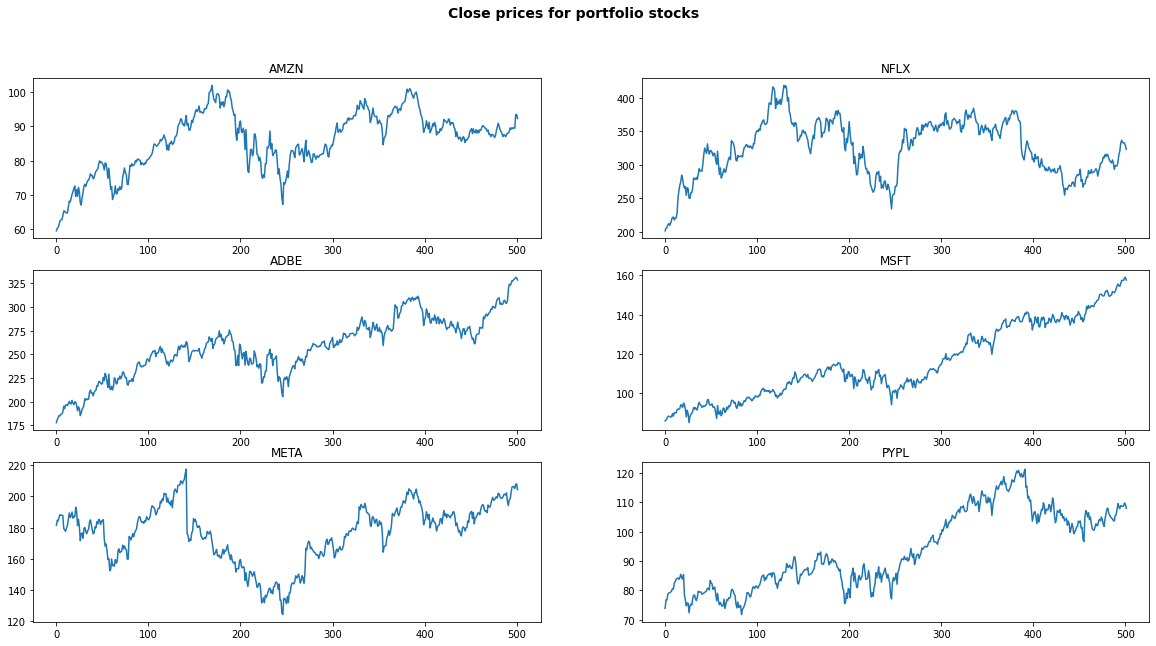

In [ ]:
num_rows = int(np.ceil(num_stocks/2))
fig, axs = plt.subplots(num_rows, 2, figsize=(20, 10))
fig.suptitle('Close prices for portfolio stocks', fontsize=14, fontweight='bold')
for i, item in enumerate(stocks):
  axs[i%num_rows, i//num_rows].plot(np.arange(df.shape[0]), df[item].values, label=f'{item} close')
  axs[i%num_rows, i//num_rows].set_title(f"{item}")

plt.show()

In [ ]:
columns_returns = [x + ' returns' for x in stocks]
returns = pd.DataFrame(0, index = df.index.values,columns = columns_returns, dtype = 'float')

In [ ]:
df.columns.values

array(['AMZN', 'ADBE', 'META', 'NFLX', 'MSFT', 'PYPL'], dtype=object)

In [ ]:
for item in (df.columns.values):
  for i in range(1, df.shape[0]):
    returns[f'{item} returns'].iat[i] = (df[item].iloc[i] - df[item].iloc[i-1])/(df[item].iloc[i-1])
returns.drop(returns.index.values[0])

AMZN returns  ADBE returns  META returns  NFLX returns  \
2018-01-03      0.012775      0.018796      0.017914      0.019794   
2018-01-04      0.004476      0.012042     -0.001841      0.002829   
2018-01-05      0.016163      0.011571      0.013671      0.021203   
2018-01-08      0.014425     -0.001619      0.007653      0.009810   
2018-01-09      0.004676      0.008971     -0.002178     -0.012922   
...                  ...           ...           ...           ...   
2019-12-23      0.003638      0.004090     -0.000582     -0.011279   
2019-12-24     -0.002114      0.002098     -0.005141      0.000300   
2019-12-26      0.044467      0.004732      0.013017     -0.001711   
2019-12-27      0.000551     -0.001238      0.001492     -0.010642   
2019-12-30     -0.012253     -0.007407     -0.017732     -0.017564   

            MSFT returns  PYPL returns  
2018-01-03      0.004654      0.039410  
2018-01-04      0.008801     -0.000261  
2018-01-05      0.012398      0.025674  
2018-01-08      0.001020      0.004447  
2018-01-09     -0.000680      0.001771  
...                  ...           ...  
2019-12-23      0.000000     -0.001287  
2019-12-24     -0.000191      0.000737  
2019-12-26      0.008197      0.009752  
2019-12-27      0.001828     -0.003189  
2019-12-30     -0.008619     -0.013071  

[501 rows x 6 columns]

### Тест Шапиро

In [ ]:
for item in returns.columns.values:
  print(shapiro(returns[item].values))

ShapiroResult(statistic=0.9485898613929749, pvalue=3.4025865892212126e-12)
ShapiroResult(statistic=0.9474508762359619, pvalue=2.3497031143709934e-12)
ShapiroResult(statistic=0.8810135126113892, pvalue=3.364319327133331e-19)
ShapiroResult(statistic=0.9773390889167786, pvalue=4.987685429114208e-07)
ShapiroResult(statistic=0.9610363841056824, pvalue=2.910421903479232e-10)
ShapiroResult(statistic=0.9610090255737305, pvalue=2.879392280163984e-10)


In [ ]:
t_parameters = []
norm_parameters = []

for item in returns.columns.values:
  t_parameters.append(t.fit(returns[item].values))
  norm_parameters.append(norm.fit(returns[item].values))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

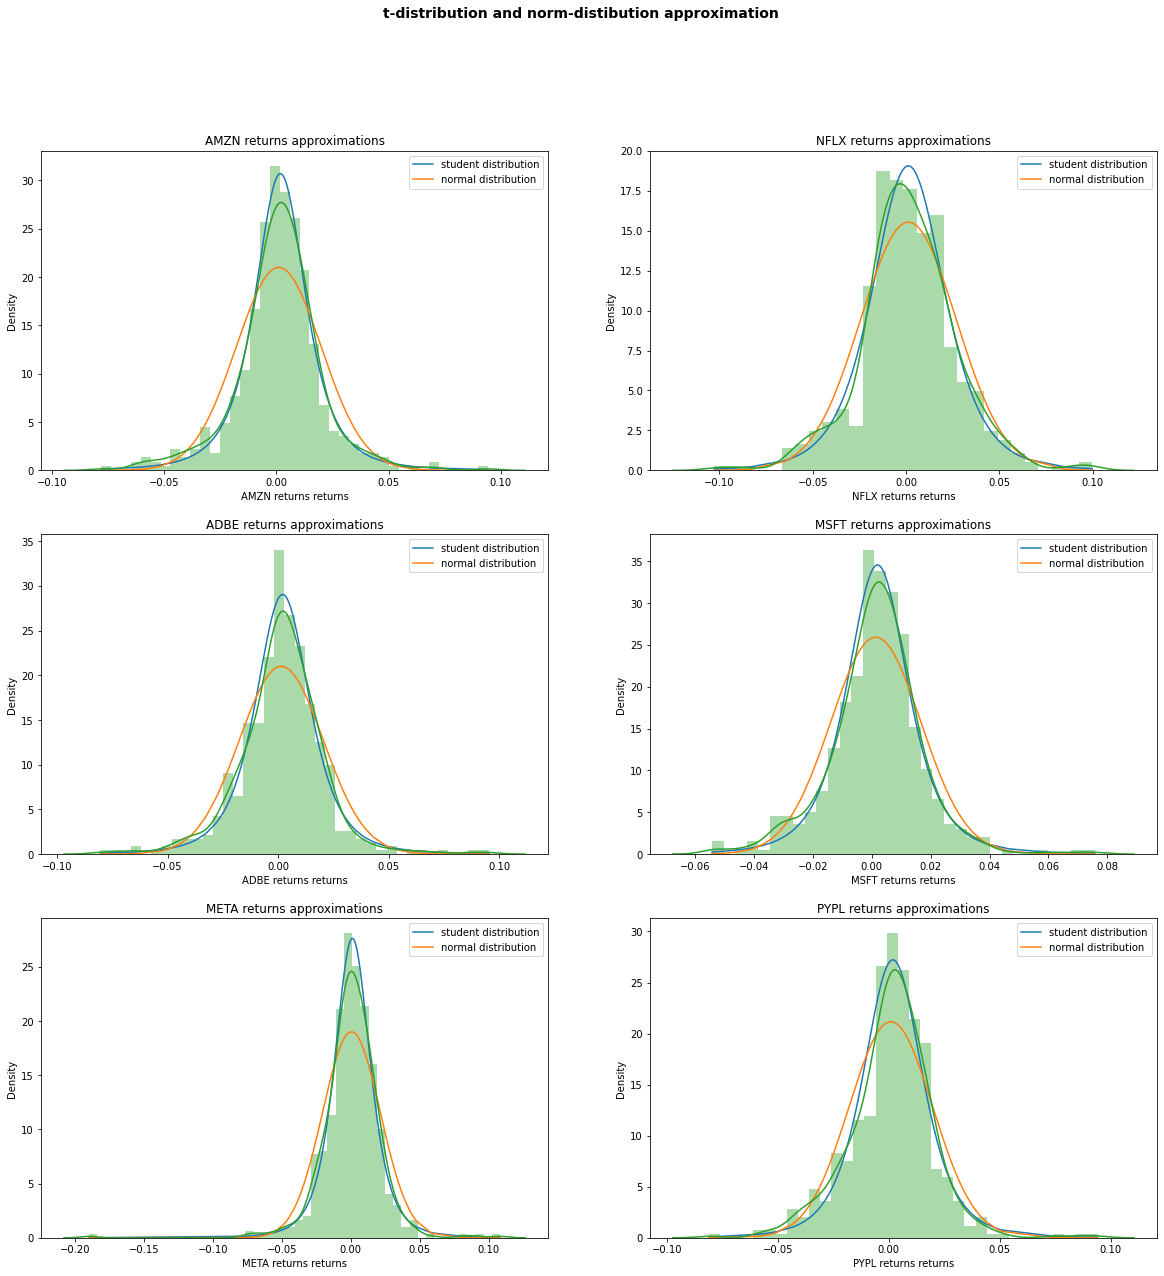

In [ ]:
num_rows = int(np.ceil(num_stocks/2))
fig, axs = plt.subplots(num_rows, 2, figsize=(20, 20))

fig.suptitle('t-distribution and norm-distibution approximation', fontsize=14, fontweight='bold')


for i, item in enumerate(returns.columns.values):

  axs[i%num_rows, i//num_rows].plot(sorted(returns[item].values), t.pdf(sorted(returns[item].values), t_parameters[i][0], t_parameters[i][1], t_parameters[i][2]), label = 'student distribution')
  axs[i%num_rows, i//num_rows].plot(sorted(returns[item].values), norm.pdf(sorted(returns[item].values), norm_parameters[i][0], norm_parameters[i][1]), label = 'normal distribution')
  sns.distplot(returns[item].values, kde = True, ax=axs[i%num_rows, i//num_rows]);
  axs[i%num_rows, i//num_rows].set_title(f"{item} approximations")
  axs[i%num_rows, i//num_rows].set_xlabel(f'{item} returns')
  axs[i%num_rows, i//num_rows].set_ylabel('Density')
  axs[i%num_rows, i//num_rows].legend()



plt.show()

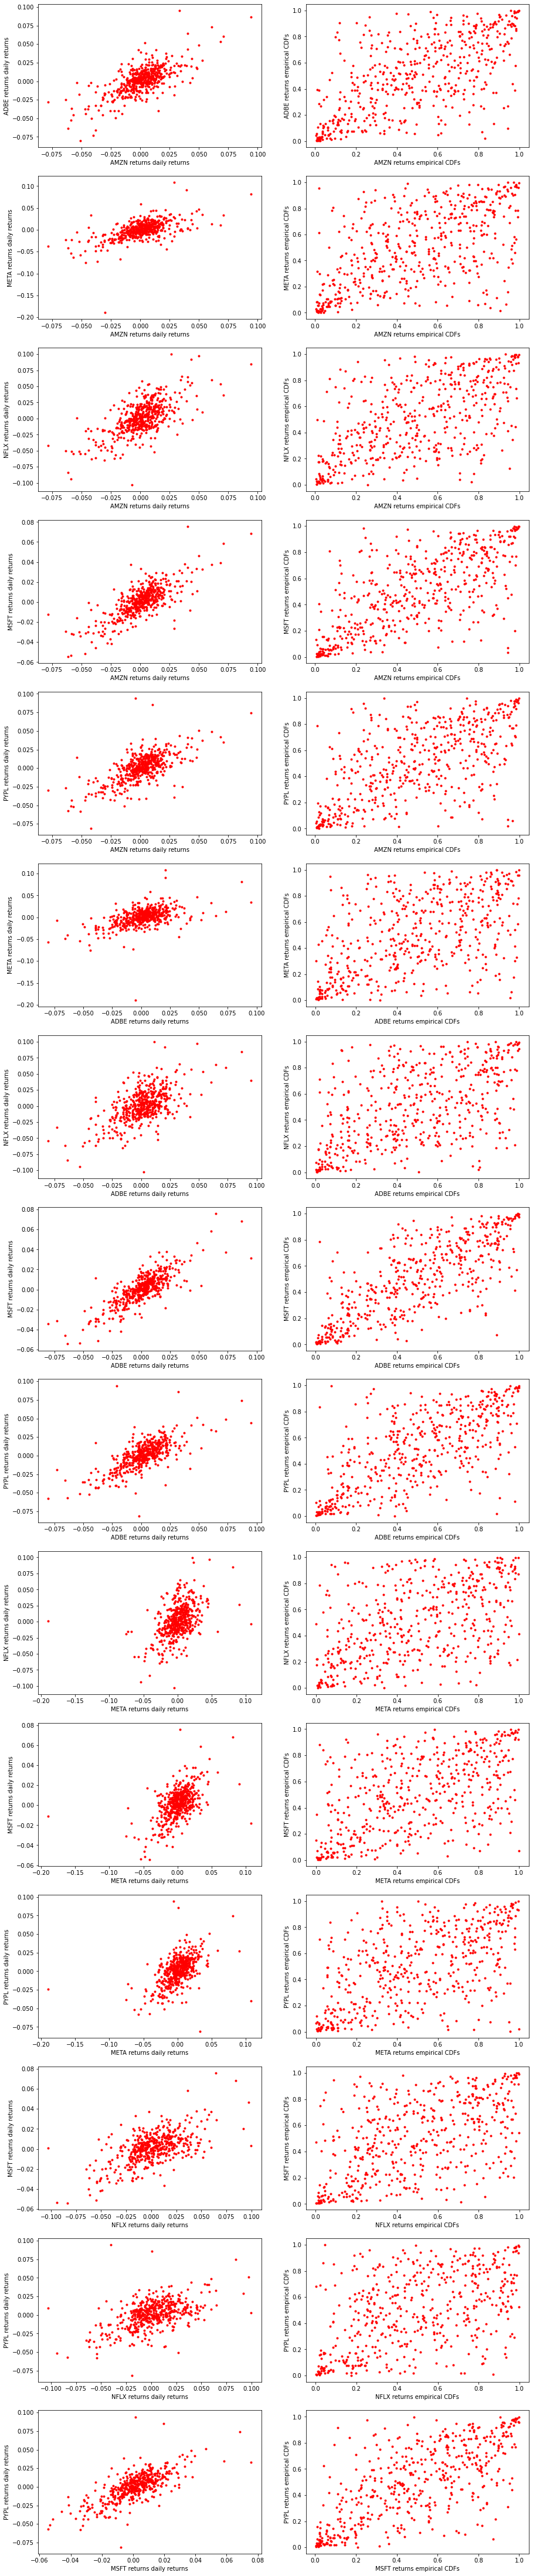

In [ ]:
row_num = 0
fig, axs = plt.subplots(15, 2, figsize=(15, 80))
for i, item in enumerate(returns.columns.values):
  for j in range(i, len(returns.columns.values)):
    if i != j:
      axs[row_num, 0].plot(returns.iloc[:,i].values, returns.iloc[:,j].values, "r.")
      axs[row_num, 0].set_xlabel(f'{returns.columns.values[i]} daily returns')
      axs[row_num, 0].set_ylabel(f'{returns.columns.values[j]} daily returns')

      axs[row_num, 1].plot(t.cdf(returns.iloc[:,i].values, t_parameters[i][0], t_parameters[i][1], t_parameters[i][2]), t.cdf(returns.iloc[:,j].values, t_parameters[j][0], t_parameters[j][1], t_parameters[j][2]), "r.")
      axs[row_num, 1].set_xlabel(f'{returns.columns.values[i]} empirical CDFs')
      axs[row_num, 1].set_ylabel(f'{returns.columns.values[j]} empirical CDFs')
      row_num = row_num + 1

plt.show()

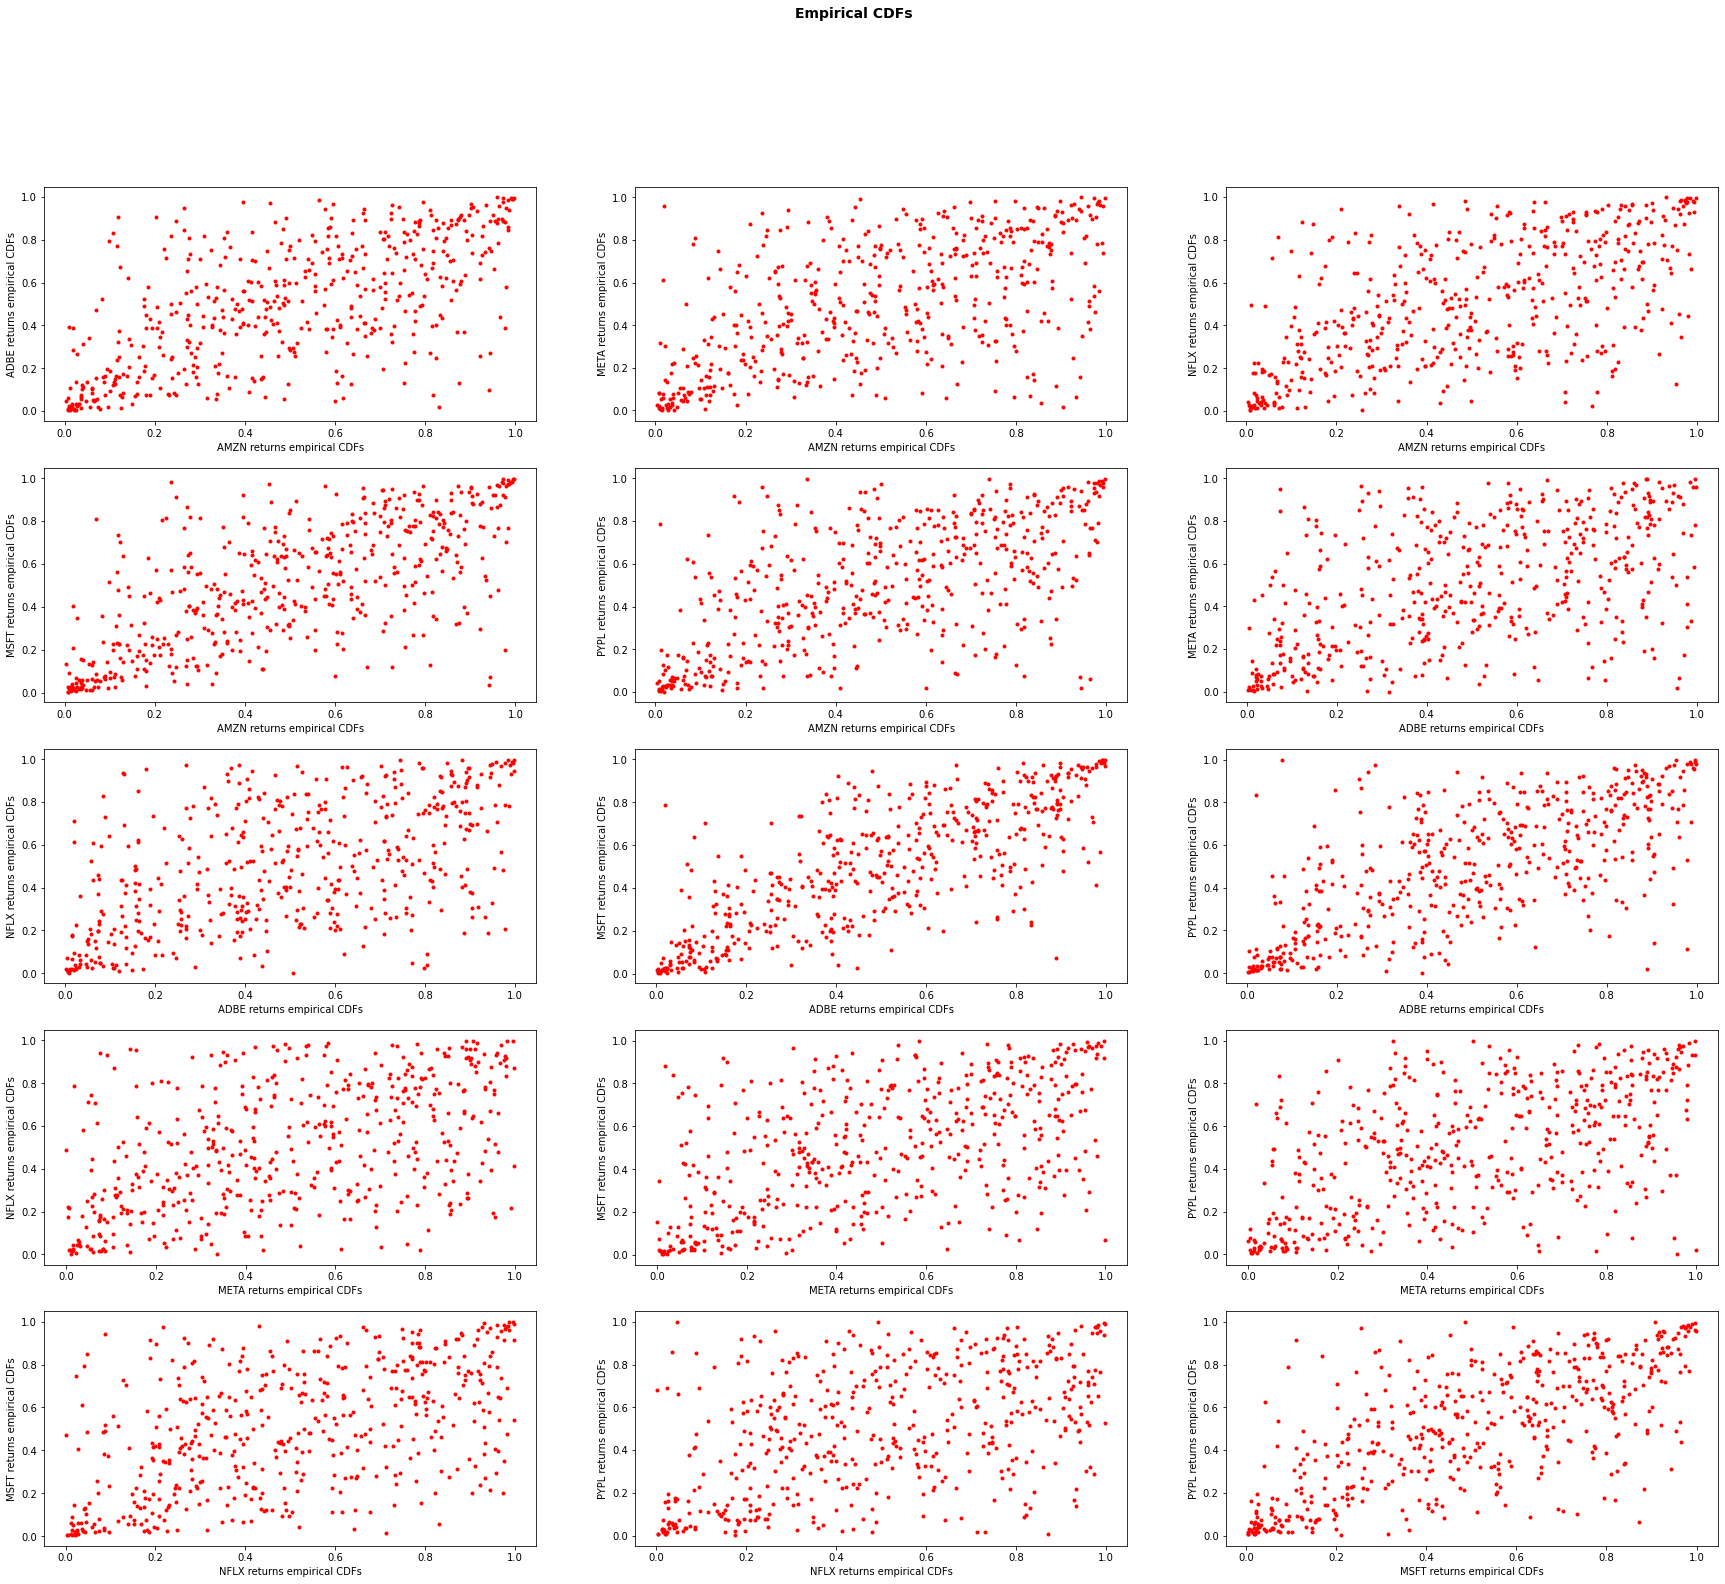

In [ ]:
row_num = 0
col_num = 0
fig, axs = plt.subplots(5, 3, figsize=(30, 25))
fig.suptitle('Empirical CDFs', fontsize=14, fontweight='bold')
for i, item in enumerate(returns.columns.values):
  for j in range(i, len(returns.columns.values)):
    if i != j:
      axs[row_num, col_num].plot(t.cdf(returns.iloc[:,i].values, t_parameters[i][0], t_parameters[i][1], t_parameters[i][2]), t.cdf(returns.iloc[:,j].values, t_parameters[j][0], t_parameters[j][1], t_parameters[j][2]), "r.")
      axs[row_num, col_num].set_xlabel(f'{returns.columns.values[i]} empirical CDFs')
      axs[row_num, col_num].set_ylabel(f'{returns.columns.values[j]} empirical CDFs')
      col_num = col_num + 1
      if col_num == 3:
        col_num = 0
        row_num = row_num + 1
plt.show()

### Работа с копулами

In [ ]:
import copulae

In [ ]:
from copulae.archimedean import GumbelCopula
from copulae import NormalCopula

In [ ]:
cdfs = pd.DataFrame(0, index = np.arange(returns.shape[0]), columns = stocks)
for i in range(len(stocks)):
  cdfs[stocks[i]] = t.cdf(returns.iloc[:,i].values, t_parameters[i][0], t_parameters[i][1], t_parameters[i][2])

### Gumbel Copula

In [ ]:
cop_Gumbel = GumbelCopula(dim=6)
cop_Gumbel.fit(cdfs)
cop_Gumbel.summary()

             AMZN        ADBE        META        NFLX        MSFT        PYPL
count  502.000000  502.000000  502.000000  502.000000  502.000000  502.000000
mean     0.500000    0.500000    0.500000    0.500000    0.500000    0.500000
std      0.288388    0.288388    0.288388    0.288388    0.288388    0.288388
min      0.001988    0.001988    0.001988    0.001988    0.001988    0.001988
25%      0.250994    0.250994    0.250994    0.250994    0.250994    0.250994
50%      0.500000    0.500000    0.500000    0.500000    0.500000    0.500000
75%      0.749006    0.749006    0.749006    0.749006    0.749006    0.749006
max      0.998012    0.998012    0.998012    0.998012    0.998012    0.998012


Gumbel Copula Summary
================================================================================
Gumbel Copula with 6 dimensions


Parameters
--------------------------------------------------------------------------------
       theta        : 1.5905986494919429

In [ ]:
n_samples = 10 ** 4
copula_simulations_Gumbel = cop_Gumbel.random(n_samples, seed=42)

In [ ]:
return_simulations_Gumbel = pd.DataFrame(0, index = np.arange(n_samples), columns = stocks, dtype = 'float')
for item in stocks:
  return_simulations_Gumbel[item] = t.ppf(copula_simulations_Gumbel[item], t_parameters[i][0], t_parameters[i][1], t_parameters[i][2])

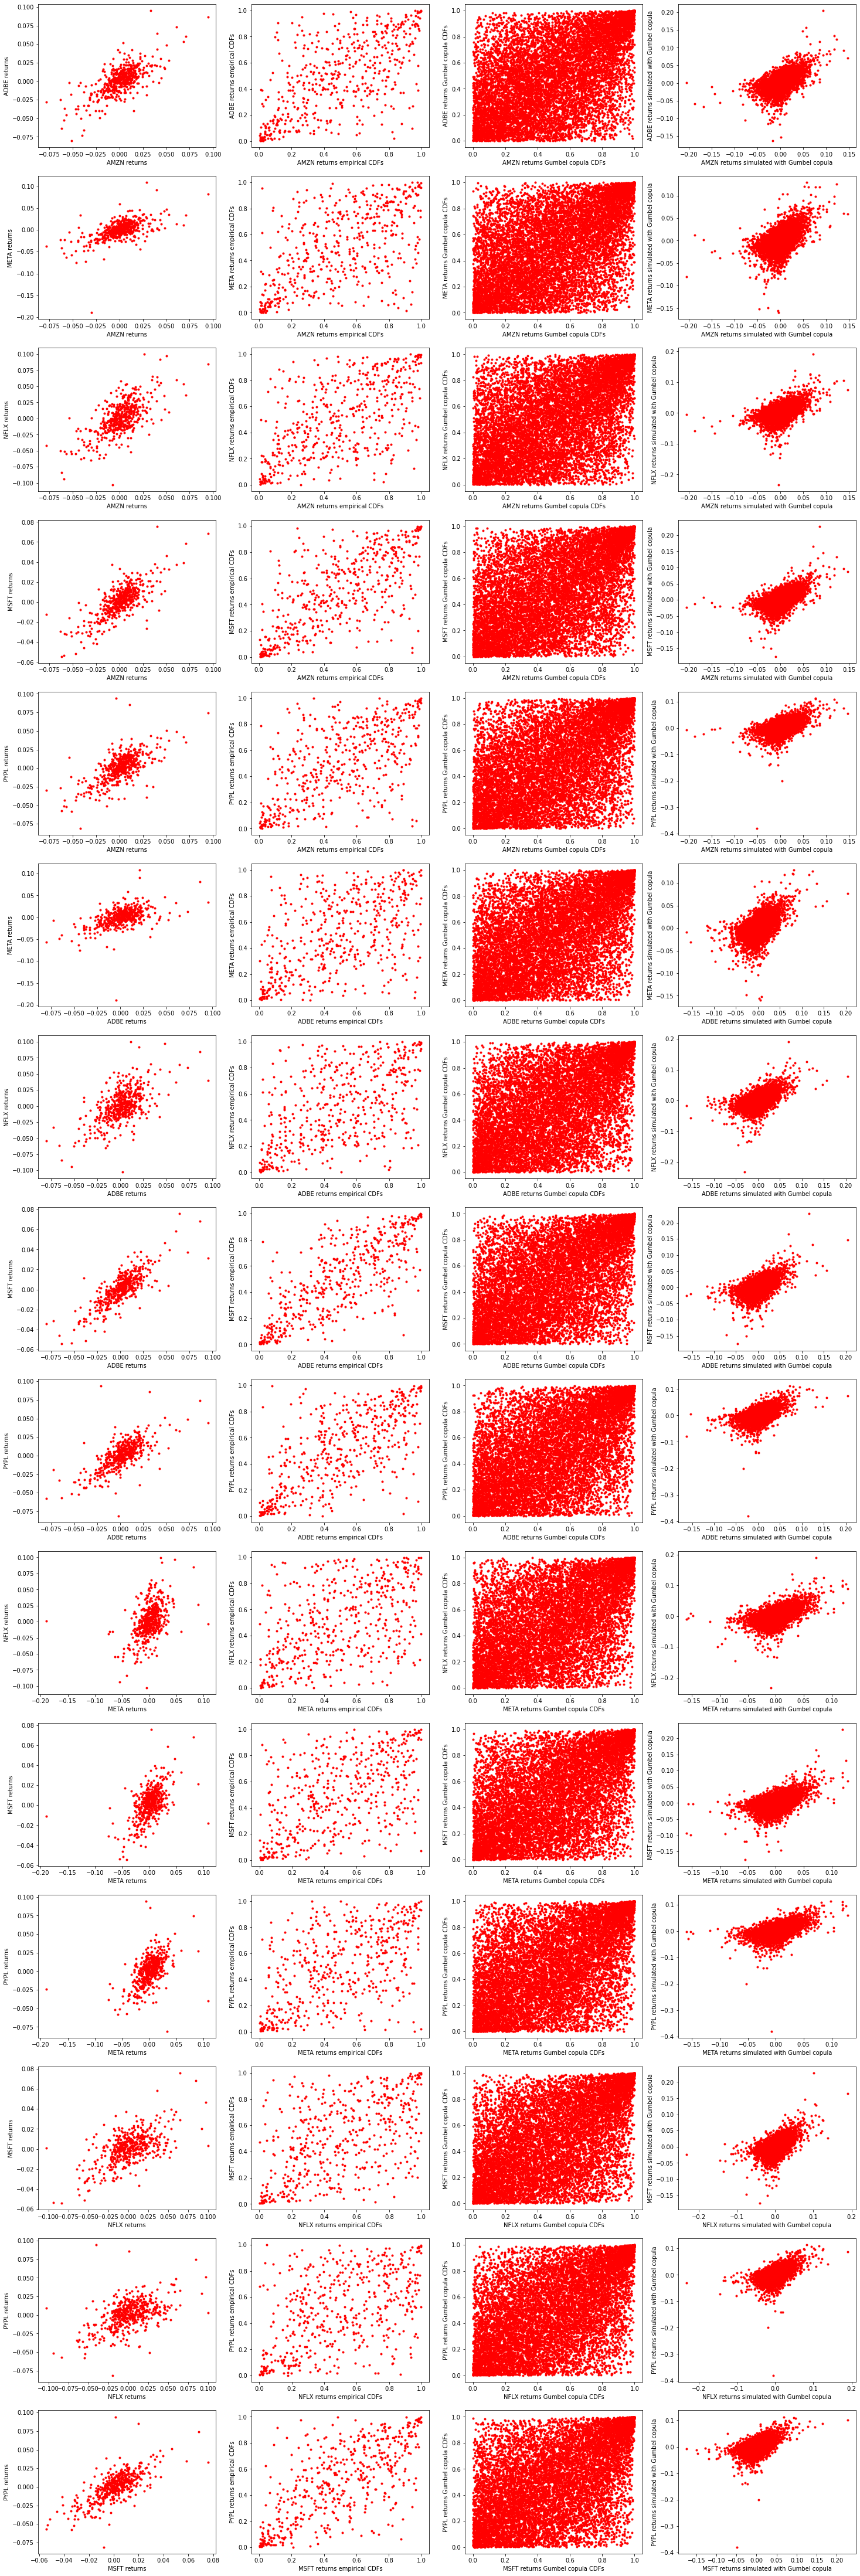

In [ ]:
row_num = 0
fig, axs = plt.subplots(15, 4, figsize=(25, 80))
for i, item in enumerate(returns.columns.values):
  for j in range(i, len(returns.columns.values)):
    if i != j:
      axs[row_num, 0].plot(returns.iloc[:,i].values, returns.iloc[:,j].values, "r.")
      axs[row_num, 0].set_xlabel(f'{returns.columns.values[i]}')
      axs[row_num, 0].set_ylabel(f'{returns.columns.values[j]}')

      axs[row_num, 1].plot(t.cdf(returns.iloc[:,i].values, t_parameters[i][0], t_parameters[i][1], t_parameters[i][2]), t.cdf(returns.iloc[:,j].values, t_parameters[j][0], t_parameters[j][1], t_parameters[j][2]), "r.")
      axs[row_num, 1].set_xlabel(f'{returns.columns.values[i]} empirical CDFs')
      axs[row_num, 1].set_ylabel(f'{returns.columns.values[j]} empirical CDFs')

      axs[row_num, 2].plot(copula_simulations_Gumbel.iloc[:,i], copula_simulations_Gumbel.iloc[:,j], "r.")
      axs[row_num, 2].set_xlabel(f'{returns.columns.values[i]} Gumbel copula CDFs')
      axs[row_num, 2].set_ylabel(f'{returns.columns.values[j]} Gumbel copula CDFs')

      axs[row_num, 3].plot(return_simulations_Gumbel.iloc[:,i], return_simulations_Gumbel.iloc[:,j], "r.")
      axs[row_num, 3].set_xlabel(f'{returns.columns.values[i]} simulated with Gumbel copula')
      axs[row_num, 3].set_ylabel(f'{returns.columns.values[j]} simulated with Gumbel copula')
      row_num = row_num + 1

plt.show()

### Normal copula

In [ ]:
cop_Normal = NormalCopula(dim=6)
cop_Normal.fit(cdfs)
cop_Normal.summary()

             AMZN        ADBE        META        NFLX        MSFT        PYPL
count  502.000000  502.000000  502.000000  502.000000  502.000000  502.000000
mean     0.500000    0.500000    0.500000    0.500000    0.500000    0.500000
std      0.288388    0.288388    0.288388    0.288388    0.288388    0.288388
min      0.001988    0.001988    0.001988    0.001988    0.001988    0.001988
25%      0.250994    0.250994    0.250994    0.250994    0.250994    0.250994
50%      0.500000    0.500000    0.500000    0.500000    0.500000    0.500000
75%      0.749006    0.749006    0.749006    0.749006    0.749006    0.749006
max      0.998012    0.998012    0.998012    0.998012    0.998012    0.998012


Gaussian Copula Summary
================================================================================
Gaussian Copula with 6 dimensions


Parameters
--------------------------------------------------------------------------------
 Correlation Matrix 
1.000000 0.677705 0.604933 0.648149 0.729128 0.653307
0.677705 1.000000 0.550269 0.584808 0.798989 0.709394
0.604933 0.550269 1.000000 0.510625 0.576793 0.560417
0.648149 0.584808 0.510625 1.000000 0.577734 0.516340
0.729128 0.798989 0.576793 0.577734 1.000000 0.727559
0.653307 0.709394 0.560417 0.516340 0.727559 1.000000

In [ ]:
copula_simulations_Normal = cop_Normal.random(n_samples, seed=42)

In [ ]:
return_simulations_Normal = pd.DataFrame(0, index = np.arange(n_samples), columns = stocks, dtype = 'float')
for item in stocks:
  return_simulations_Normal[item] = norm.ppf(copula_simulations_Normal[item], norm_parameters[i][0], norm_parameters[i][1])

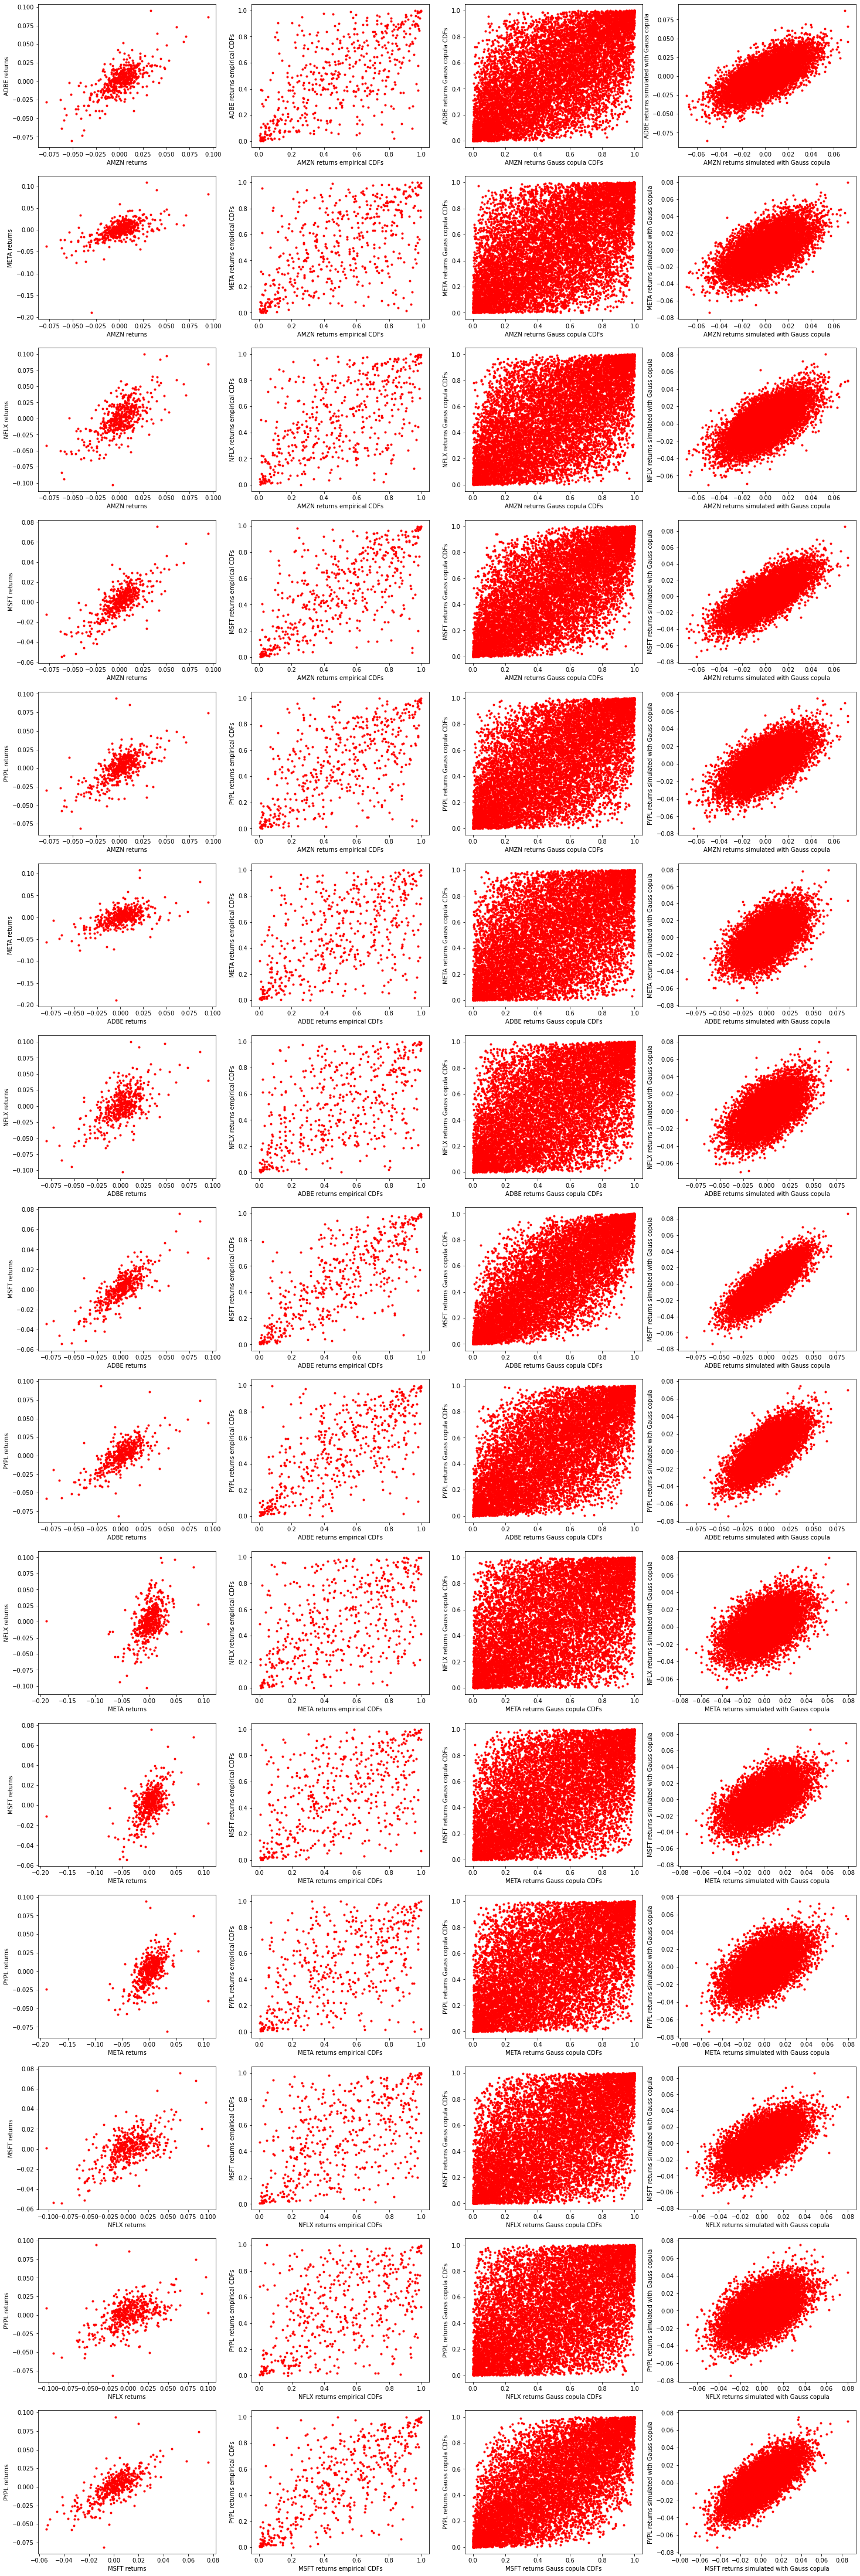

In [ ]:
row_num = 0
fig, axs = plt.subplots(15, 4, figsize=(25, 80))
for i, item in enumerate(returns.columns.values):
  for j in range(i, len(returns.columns.values)):
    if i != j:
      axs[row_num, 0].plot(returns.iloc[:,i].values, returns.iloc[:,j].values, "r.")
      axs[row_num, 0].set_xlabel(f'{returns.columns.values[i]}')
      axs[row_num, 0].set_ylabel(f'{returns.columns.values[j]}')

      axs[row_num, 1].plot(t.cdf(returns.iloc[:,i].values, t_parameters[i][0], t_parameters[i][1], t_parameters[i][2]), t.cdf(returns.iloc[:,j].values, t_parameters[j][0], t_parameters[j][1], t_parameters[j][2]), "r.")
      axs[row_num, 1].set_xlabel(f'{returns.columns.values[i]} empirical CDFs')
      axs[row_num, 1].set_ylabel(f'{returns.columns.values[j]} empirical CDFs')

      axs[row_num, 2].plot(copula_simulations_Normal.iloc[:,i], copula_simulations_Normal.iloc[:,j], "r.")
      axs[row_num, 2].set_xlabel(f'{returns.columns.values[i]} Gauss copula CDFs')
      axs[row_num, 2].set_ylabel(f'{returns.columns.values[j]} Gauss copula CDFs')

      axs[row_num, 3].plot(return_simulations_Normal.iloc[:,i], return_simulations_Normal.iloc[:,j], "r.")
      axs[row_num, 3].set_xlabel(f'{returns.columns.values[i]} simulated with Gauss copula')
      axs[row_num, 3].set_ylabel(f'{returns.columns.values[j]} simulated with Gauss copula')
      row_num = row_num + 1

plt.show()

In [ ]:
portfolio_real_returns = np.dot(returns.values, weights)
portfolio_simulated_returns_Gumbel = np.dot(return_simulations_Gumbel.values, weights)
portfolio_simulated_returns_Normal = np.dot(return_simulations_Normal.values, weights)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


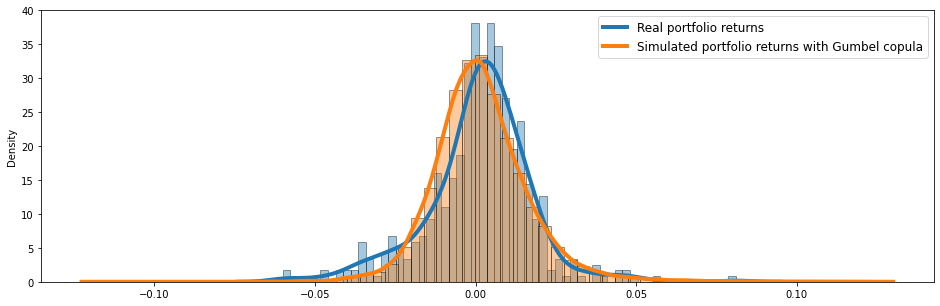

In [ ]:
fig = plt.figure(figsize=(16, 5))

sns.distplot(portfolio_real_returns, hist=True, kde=True,
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(portfolio_simulated_returns_Gumbel, hist=True, kde=True,
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.legend(['Real portfolio returns',
            'Simulated portfolio returns with Gumbel copula'], fontsize=12)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


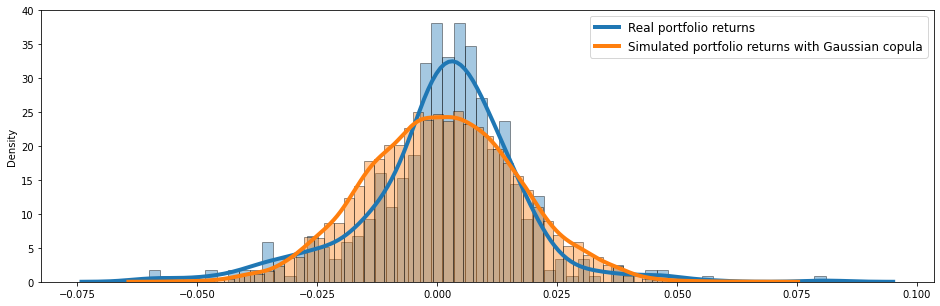

In [ ]:
fig = plt.figure(figsize=(16, 5))

sns.distplot(portfolio_real_returns, hist=True, kde=True,
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(portfolio_simulated_returns_Normal, hist=True, kde=True,
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.legend(['Real portfolio returns',
            'Simulated portfolio returns with Gaussian copula'], fontsize=12)
plt.show()

### Считаем VaR

In [ ]:
def calc_VaR(r, r_simulated, w, L_history=252, level=0.01):
  VaR = [None for i in range(252)]
  for i in range(L_history, r.shape[0]):
      portfolio_simulated_returns = np.dot(r_simulated.values[i - L_history: i], w)
      VaR.append(np.quantile(portfolio_simulated_returns, level))
  return pd.Series(data=VaR, index=r.index)

In [ ]:
Var_Gumbel = calc_VaR(returns, return_simulations_Gumbel, weights, level=0.01)

In [ ]:
Var_Normal = calc_VaR(returns, return_simulations_Normal, weights, level=0.01)

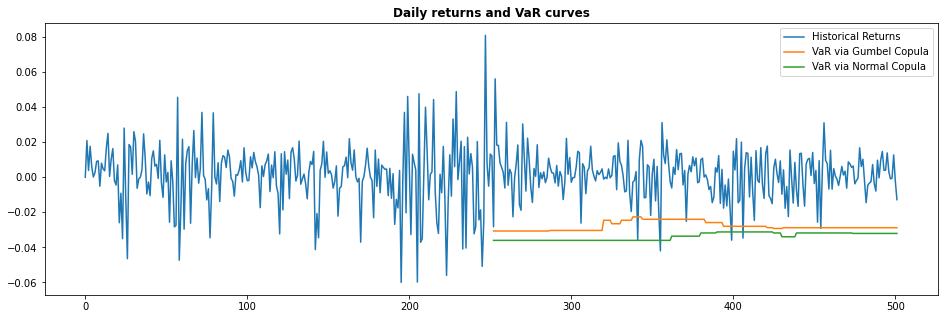

In [ ]:
fig = plt.figure(figsize=(16, 5))

plt.plot(np.arange(len(portfolio_real_returns)), portfolio_real_returns, label = 'Historical returns')
plt.plot(np.arange(len(portfolio_real_returns)), Var_Gumbel.values, label = 'Gumbel' )
plt.plot(np.arange(len(portfolio_real_returns)), Var_Normal.values, label = 'Normal' )
plt.title("Daily returns and VaR curves", weight="bold")

plt.legend(['Historical Returns',
            'VaR via Gumbel Copula',
            'VaR via Normal Copula'])

plt.show()